## 오늘의 학습
### 학습 내용
1. 트랜스포머와 인코더 디코더
   - 트랜스포머에서 사용되는 인코더와 디코더를 알아보고, 전체적인 구조를 파악
2. 트랜스포머의 입력 이해하기
   트랜스포머의 입력 방식을 알아보고, PositionalEncoding Layer의 코드를 학습
3. 어텐션? 어텐션!
   - 어텐션 메커니즘에 대해서 알아보고, 트랜스포머에서 사용되는 3가지 어텐션을 파악
4. 스케일드 닷 프로덕트 어텐션
   - 스케일드 닷 프로덕트 어텐션을 알아보고, 함수 코드로 구현하며 학습
5. 머리가 여러 개인 어텐션
   - 멀티 헤드 어텐션을 알아보고, 코드로 구현하며 학습
6. 마스킹
   - 트랜스포머에서 사용하는 2가지 마스킹(Padding Masking, Look ahead Masking)에 대해서 알아보고, 코드를 통해 어떻게 사용되는지 학습
7. 인코더
   - 인코더를 설계하고, 코드로 구현해보며 학습
8. 디코더
   - 디코더를 설계하고, 코드로 구현해보며 학습
9. 챗봇의 병렬 데이터 받아오기
   - 학습에 사용할 데이터셋을 준비하는 과정을 수행
10. 병렬 데이터 전처리하기
    - 준비된 데이터를 학습시키기 위해 전처리과정을 수행하며, 교사 강요에 대해서 학습
11. 모델 정의 및 학습하기
    - 트랜스포머 모델을 정의하고 훈련까지 수행
12. 챗봇 테스트하기
    - 학습된 트랜스포머를 사용하여 테스트를 진행

### 학습 목표
- 트랜스포머의 인코더 디코더 구조 이해
- 내부 단어 토크나이저 사용
- 셀프 어텐션 이해
- 한국어에도 적용


### 챗봇의 종류
- 대화형 챗봇
- 트리형(버튼) 챗봇
- 추천형 챗봇
- 시나리오형 챗봇
- 결합형 챗봇
- 기존 챗봇의 한계
  - 대화형을 제외하면 사실상 챗봇은 대화형 UX를 가졌지만 본질적으로는 검색엔진이거나, 혹은 음성 ARS를 대화형 UX에 옮겨놓은 것
  -  규칙 기반으로 구현된 챗봇은 사전에 정해진 말만 알아듣고 반응

**챗봇의 역사**  
- LSTM 등 RNN 기반의 딥러닝 모델
- 인코더-디코더 구조로 엮은 seq2seq 모델
- BERT, ALBERT : 트랜스포머(Transformer)라는 모델을 활용하여 pretrain을 적용
- **Transformer**
  - 병렬처리에 불리한 LSTM에 비해 훨씬 뛰어난 처리 속도
  - LSTM 등 RNN 모델이 가지는 장기 의존성에 강건한 특징 때문에 매우 긴 길이의 문장을 처리하는 데 유리
  - 자연어처리 분야의 혁신을 가져온 발판

## Transformer
- 2017년에 발표
- 자연어 처리 분야를 넘어 이미지 인식 분야에도 큰 영향
- 2024년 초까지도 ChatGPT-3, SORA 등 다양한 분야에서 SOTA 모델들이 이 구조를 차용

### 구조
- RNN, LSTM 등을 거치며 기존의 복잡해지는 순환 층이나 합성곱 층을 전부 제외하고, 어텐션 매커니즘만으로 구성된 모델
![transformer](https://upload.wikimedia.org/wikipedia/commons/3/34/Transformer%2C_full_architecture.png)
- 인코더 층(Encoder layer, 왼쪽)
  -2개의 서브 레이어
    - 멀티헤드 셀프 어텐션 (혹은 인코더 셀프 어텐션)
    - 피드포워드 신경망
    - 이 둘을 N번을 반복 통과한 후, 디코더 층으로 계산 결과를 보냄
- 디코더 층(Decoder layer, 오른쪽)
  - 3개의 서브레이어
    - 마스크드 멀티헤드 셀프 어텐션 (혹은 디코더 셀프 어텐션)
    - 멀티헤드 어텐션 (혹은 인코더-디코더 셀프 어텐션)
    - 피드포워드 신경망
    - N번 반복 통과한 후, 계산 결과를 출력
- 각 블록은 N개씩 반복 배치
- 마지막으로 인코더 층/디코더 층에 임베딩 출력을 입력하기 전에 포지셔널 인코딩을 합침

### 트랜스포머와 인코더 디코더
#### 인코더와 디코더 구조
![seq2seq](https://6chaoran.wordpress.com/wp-content/uploads/2019/01/encoder-decoder-architecture.png?w=700&h=388&crop=1)
- 번역기는 인코더와 디코더 두 가지 아키텍처로 구성
- 인코더에 입력 문장이 들어가고, 디코더는 이에 상응하는 출력 문장을 생성
- 입력 문장과 출력 문장 두 가지 병렬 구조로 구성된 데이터셋을 훈련

**훈련 데이터셋의 구성**  
- 번역
  - 입력 문장 : '저는 학생입니다.'
  - 출력 문장 : 'I am a student'
- 질문-답변
  - 입력 문장 : '오늘의 날씨는 어때?'
  - 출력 문장 : '오늘은 매우 화창한 날씨야'

**트랜스포머의 인코더와 디코더**  
![transformer](http://jalammar.github.io/images/t/the_transformer_3.png)
- 트랜스포머 또한 번역기와 마찬가지로 기본적으로 인코더와 디코더 구성
![transformer2](http://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png)
- 입력 문장은 누적해 쌓아 올린 인코더의 층을 통해서 정보를 뽑음
  - 인코더는 입력 문장을 임베딩하고 문장의 의미를 파악하여 디코더에 전달
- 디코더는 누적해 쌓아 올린 디코더의 층을 통해서 출력 문장의 단어를 하나씩 만들어가는 구조
  - 디코더는 인코더에서 전달 받은 정보를 기반으로 문장을 생성
![transformer3](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_3.png)

### 트랜스포머의 입력 이해하기

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("슝=3")

슝=3


![positional-encoding](https://wikidocs.net/images/page/31379/transformer5_final_final.PNG)
- 벡터화 과정 : 많은 자연어 처리 모델들이 텍스트 문장을 입력으로 받기 위해 거치는, 단어를 임베딩 벡터로 변환하는 과정
- 트랜스포머 역시 벡터화 과정을 거침
- 트랜스포머 모델의 입력 데이터 처리 과정에서는 **포지셔널 인코딩(positional Encoding)**이라는 것을 거침
  - 임베딩 벡터에 어떤 값을 더해준 뒤에 입력으로 사용

![pe2](https://wikidocs.net/images/page/31379/transformer6_final.PNG)
- 입력을 받을 때, 문장에 있는 단어들을 1개씩 순차적으로 받는 것이 아니라, 문장에 있는 모든 단어를 한꺼번에 입력으로 받기 때문
  - 같은 단어라도 그 단어가 문장의 몇 번째 어순으로 입력되었는지를 모델에 추가로 알려 주기 위해, 단어의 임베딩 벡터에다가 위치 정보를 가진 벡터(Positional Encoding) 값을 더해서 모델의 입력으로 삼는 것
- RNN에는 어차피 문장을 구성하는 단어들이 어순대로 모델에 입력 -> 모델에게 따로 어순 정보를 알려줄 필요가 없었음  

**포지셔널 인코딩의 벡터값**  
![fo](https://velog.velcdn.com/images%2Fzoozoo096010%2Fpost%2F7ca3e07c-d8ce-43cd-a51c-32fa96f1ba6c%2Fimage.png)
- 사인 함수와 코사인 함수의 그래프를 상기해보면 요동치는 값의 형태를 생각해 볼 수 있음
- 트랜스포머는 사인 함수와 코사인 함수의 값을 임베딩 벡터에 더해줌으로써 단어의 순서 정보를 더하여 줌  

![transformer7](https://wikidocs.net/images/page/31379/transformer7.PNG)
- 임베딩 벡터와 포지셔널 인코딩의 덧셈은 사실 임베딩 벡터가 모여 만들어진 문장 벡터 행렬과 포지셔널 인코딩 행렬의 덧셈 연산을 통해 이루어짐
- pos = 입력 문장에서의 Embedding 벡터의 위치
- i = Embedding 벡터 내의 차원의 인덱스
- d_model = 트랜스포머의 인코더와 디코더에서의 정해진 입력과 출력의 크기

**Q. 한 문장에 같은 단어 A가 여러 번 등장했다고 가정. 임베딩 문장 행렬에 포지셔널 인코딩을 해주었을 때와 해주지 않았을 때, 트랜스포머가 임베딩 문장 행렬 내의 다수의 A 단어 벡터로부터 얻을 수 있는 정보의 차이는 어떤 것이 있을까요?**  
- 같은 단어라고 하더라도 포지셔널 인코딩을 해준 경우에는 임베딩 벡터값이 달라지므로, 같은 단어라고 해도 각각 다른 위치에 등장했다는 사실을 모델에 알려줄 수 있음

#### Positional matrix

**에러 수정**  
```
# SparseTensor를 DenseTensor로 변환
    if isinstance(inputs, tf.SparseTensor):
        inputs = tf.sparse.to_dense(inputs)
```
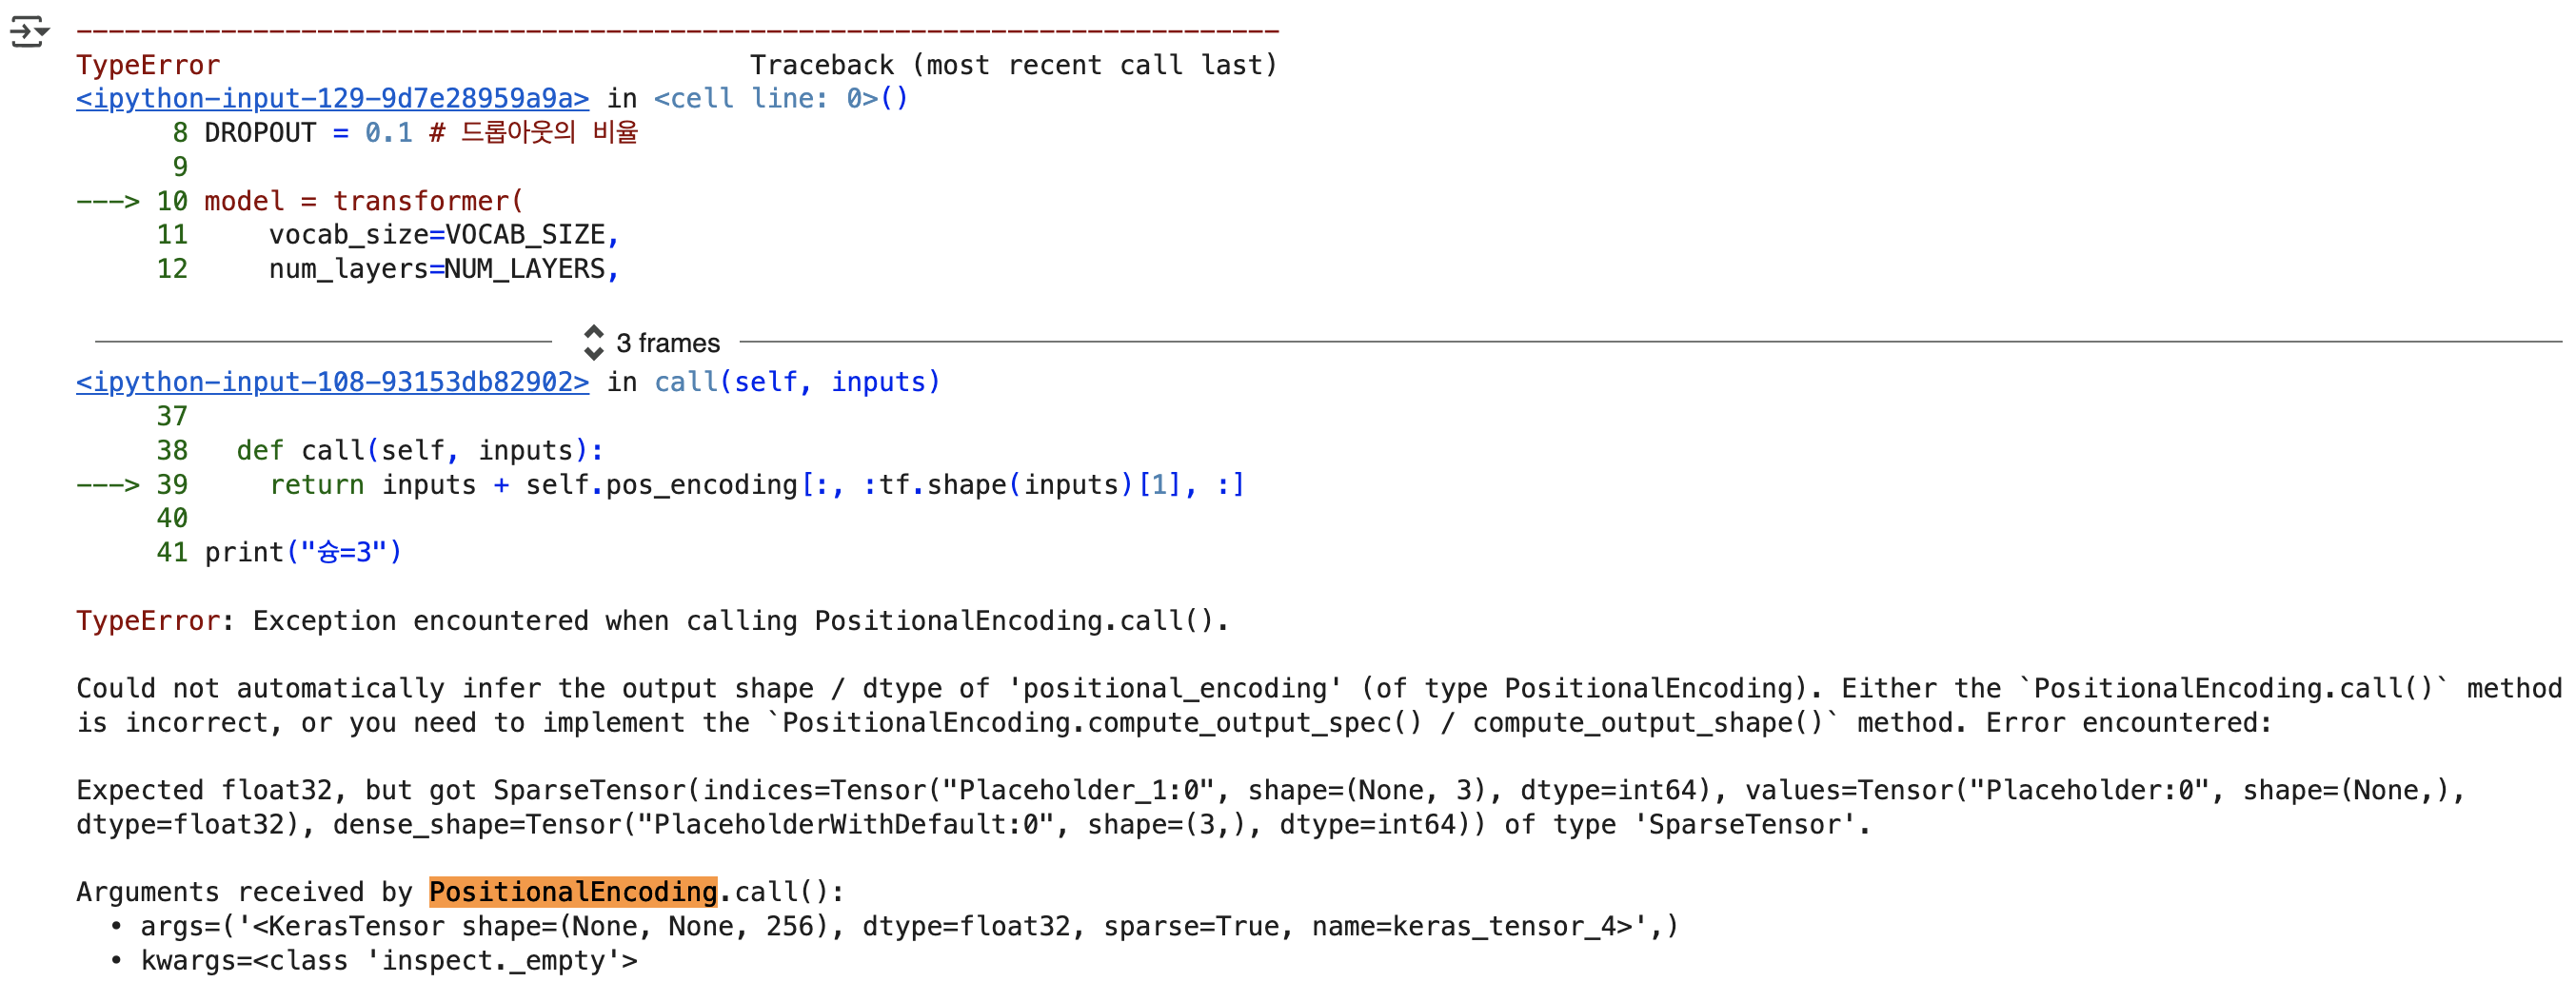

In [130]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0])
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    # angle_rads = np.zeros(angle_rads.shape)
    # angle_rads[:, 0::2] = sines
    # angle_rads[:, 1::2] = cosines
    # pos_encoding = tf.constant(angle_rads)

    pos_encoding = pos_encoding[tf.newaxis, ...]

    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    # SparseTensor를 DenseTensor로 변환
    if isinstance(inputs, tf.SparseTensor):
        inputs = tf.sparse.to_dense(inputs)

    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("슝=3")

슝=3


- 행의 크기가 50, 열의 크기가 512인 행렬을 만드는 코드를 완성하여 입력 벡터 모양을 시각화
(최대 문장의 길이가 50이고 워드 임베딩 차원을 512로 하는 모델의 입력 벡터 모양)

- 임베딩 벡터의 차원이 256이고 최대 문장의 길이가 30인 텍스트를 입력으로 하는 트랜스포머를 구현한다고 하였을 때, 적절한 포지셔널 인코딩 행렬의 크기를 추측해보고 위에 구현한 포지셔널 인코딩 레이어를 사용해 표현

[**Positional Encoding Explained: A Deep Dive into Transformer PE**](https://medium.com/thedeephub/positional-encoding-explained-a-deep-dive-into-transformer-pe-65cfe8cfe10b)

The Intuition: From Bits to Waves  
- Binary Representation
```
0:  0 0 0 0    8:  1 0 0 0  
1:  0 0 0 1    9:  1 0 0 1  
2:  0 0 1 0    10: 1 0 1 0  
3:  0 0 1 1    11: 1 0 1 1  
4:  0 1 0 0    12: 1 1 0 0  
5:  0 1 0 1    13: 1 1 0 1  
6:  0 1 1 0    14: 1 1 1 0  
7:  0 1 1 1    15: 1 1 1 1  
```
  - The rightmost bit (Least Significant Bit) alternates with every number (frequency: 1/2)
  - The second bit from the right alternates every two numbers (frequency: 1/4)
  - The third bit alternates every four numbers (frequency: 1/8) And so on…
- Sinusoidal Positional Encoding
  1. For each position in the sequence, we generate a vector of numbers.
  2. Each number in this vector is calculated using either a sine or cosine function.
  3. We use different frequencies for different dimensions of the vector.
  ![https://miro.medium.com/v2/resize:fit:1400/format:webp/0*jCV-3u3T5S4DbUGa.png](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*jCV-3u3T5S4DbUGa.png)



**Heatmap**  

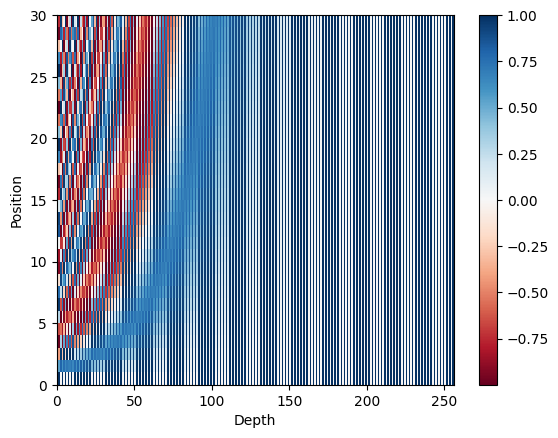

In [17]:
sample_pos_encoding = PositionalEncoding(30, 256)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 256))
plt.ylabel('Position')
plt.colorbar()
plt.show()

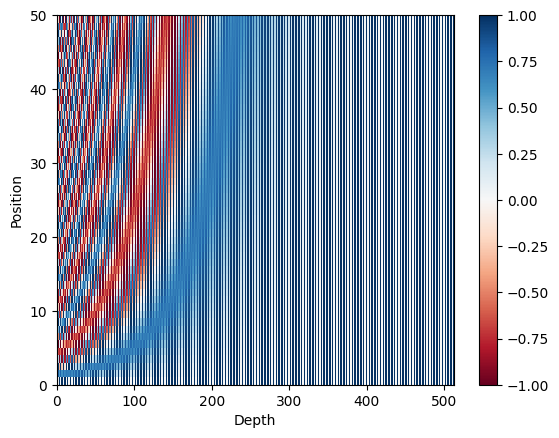

In [40]:
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

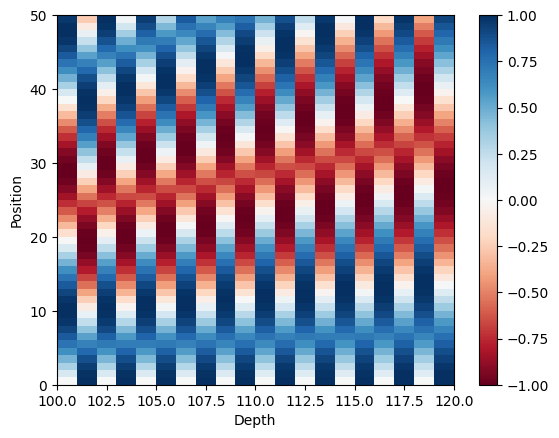

In [41]:
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((100, 120))
plt.ylabel('Position')
plt.colorbar()
plt.show()

This plot is analogous to our binary representation table, but with a continuous spectrum instead of discrete 0s and 1s:

1. Each row represents a token in the sequence, similar to how each row in our binary table represented a number.

2. Each column corresponds to a dimension in our tokens encoding, analogous to the bit positions in binary.

3. The colors represent values oscillating between -1 (blue) and 1 (red), which is a continuous version of the 0s and 1s in binary.

**Key Observations:**

- The first row (position 0) is like our binary “0000”, serving as the starting point.

- As we move down the rows (increasing positions), we see patterns of color changes, similar to how bits flip in binary counting.

- The leftmost columns (lower dimensions) change rapidly, like the least significant bits in binary.

- The rightmost columns (higher dimensions) change more slowly, analogous to the most significant bits in binary.

**Line Plot**

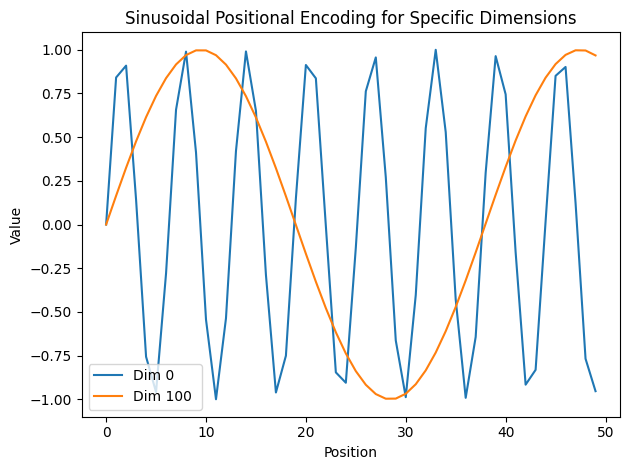

In [38]:
dimensions = [0 , 100]
for d in dimensions:
    plt.plot(sample_pos_encoding.pos_encoding.numpy()[0][:, d], label= f'Dim {d} ' )
plt.legend()
plt.title('Sinusoidal Positional Encoding for Specific Dimensions')
plt.xlabel('Position')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

The line plot focuses on specific dimensions and how they change with position, directly mirroring our binary analogy:

1. Each line represents a specific dimension, similar to tracking a single column (bit position) in our binary table.

2. The x-axis shows the position in the sequence, equivalent to counting up in our binary example.

**Key Observations:**  

- Dimension 0 (blue line) oscillates rapidly, changing with every position. This is exactly like the rightmost bit in binary, which flips with every count.

- Dimension 21 (orange line) changes much more slowly, similar to how the bits further left in our binary representation flip less frequently.

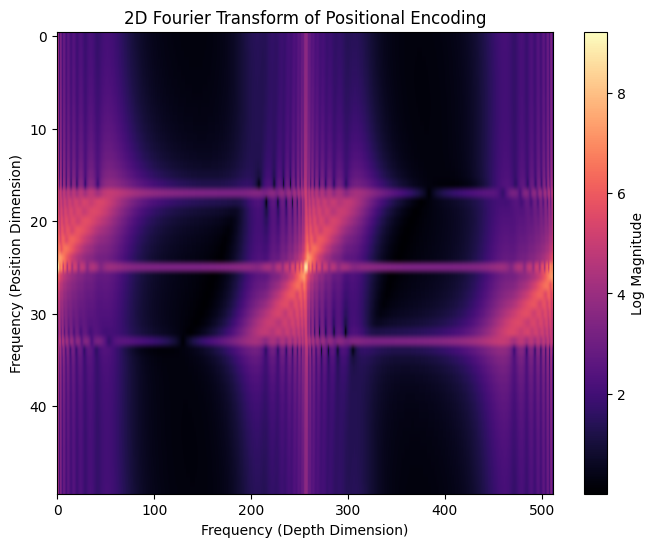

In [27]:
test_encoding = sample_pos_encoding.pos_encoding.numpy()[0]

# 2D 푸리에 변환 (주파수 영역 변환)
fft_pos_encoding = np.fft.fft2(test_encoding)
fft_magnitude = np.abs(np.fft.fftshift(fft_pos_encoding))

# 로그 스케일로 변환하여 가시성 증가
fft_magnitude_log = np.log1p(fft_magnitude)

# 주파수 평면 시각화
plt.figure(figsize=(8, 6))
plt.imshow(fft_magnitude_log, cmap='magma', aspect='auto')
plt.colorbar(label='Log Magnitude')
plt.xlabel("Frequency (Depth Dimension)")
plt.ylabel("Frequency (Position Dimension)")
plt.title("2D Fourier Transform of Positional Encoding")
plt.show()

### 어텐션
![Attention](https://wikidocs.net/images/page/22893/%EC%BF%BC%EB%A6%AC.PNG)
- 어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구함
- 구해낸 이 유사도를 가중치로 하여 키와 맵핑되어있는 각각의 '값(Value)'에 반영
- 유사도가 반영된 '값(Value)'을 가중합하여(모두 더해서 뭉쳐주면) 이를 최종 결과인 **어텐션 값(Attention Value)**으로 반환

**트랜스포머에서 사용된 어텐션**  
![transformer-attention](https://wikidocs.net/images/page/31379/attention.PNG)
- 인코더 셀프 어텐션 : 인코더
- 디코더 셀프 어텐션 : 디코더
- 인코더-디코더 어텐션 : 디코더
- 셀프 어텐션은 본질적으로 Query, Key, Value가 동일한 경우
- 인코더-디코더 어텐션에서는 Query가 디코더의 벡터인 반면에 Key와 Value가 인코더의 벡터이므로 셀프 어텐션이라고 부르지 않음

![transformer_attention_overview](https://wikidocs.net/images/page/31379/transformer_attention_overview.PNG)
- 쿼리(Query), 키(Key), 밸류(Value) 는 기본적으로 '단어 (정보를 함축한) 벡터'
  - '단어 벡터' 란 초기 입력으로 사용되었던 임베딩 벡터가 아니고, 트랜스포머의 여러 연산을 거친 후의 단어 벡터
- 인코더 셀프 어텐션 : 인코더의 입력으로 들어간 문장 내 단어들이 서로 유사도를 구함
- 디코더 셀프 어텐션 : 단어를 1개씩 생성하는 디코더가 이미 생성된 앞 단어들과의 유사도를 구함
- 인코더-디코더 어텐션 : 디코더가 잘! 예측하기 위해서 인코더에 입력된 단어들과 유사도를 구함
  - 예를 들어, 입력 문장 ‘저는 학생입니다.’와 출력 문장 ‘I am a student’에서 ‘학생’ 단어가 ‘I’, ‘am’, ‘a’, ‘student’ 중 어떤 단어와 유사한지를 계산하는 것

**Self Attention**  
- 유사도를 구하는 대상이 다른 문장의 단어가 아니라 현재 문장 내의 단어들이 서로 유사도를 구하는 경우
- 인코더-디코더 어텐션은 서로 다른 단어 목록(인코더 내 단어와 디코더 내 단어) 사이에서 유사도를 구하기에 셀프 어텐션이 아님  
![selfattention](https://wikidocs.net/images/page/31379/transformer10.png)
- 그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다.
- 여기서 그것(it) 에 해당하는 것은 과연 길(street) 일까요? 동물(animal) 일까?
- 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구하여 그것(it) 이 동물(animal) 과 연관되었을 확률이 높다는 것을 찾아냄

**그럼 어떻게 유사도를 구하지??**

### **Scaled dot-product Attention**
- 유사도를 구하는 방법

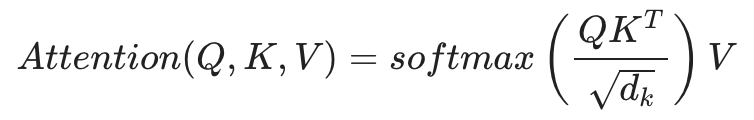

- Q, K, V는 각각 쿼리(Query), 키(Key), 값(Value)
- 어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구함
- 구해낸 이 유사도를 키와 맵핑되어있는 각각의 '값(Value)'에 반영
- 유사도가 반영된 '값(Value)'을 모두 더해서 뭉쳐주면 이를 최종 결과인 어텐션 값(Attention Value)라고 함

#### Q와 K의 유사도를 구하는 과정 & 어텐션 값 구하기

1. Q, K, V는 단어 벡터를 행으로 하는 문장 행렬이다.
2. 벡터의 내적(dot product) 은 벡터의 유사도를 의미한다.
3. 특정 값을 분모로 사용하는 것은 값의 크기를 조절하는 스케일링(Scaling)을 위함이다.

![https://wikidocs.net/images/page/31379/transformer15.PNG](https://wikidocs.net/images/page/31379/transformer15.PNG)
- 문장 행렬 Q와 문장 행렬 K를 곱하면 위의 그림과 같은 초록색 행렬을 얻을 수 있음
- 'am' 행과 'student' 열의 값은 Q 행렬에 있던 'am' 벡터와 K 행렬에 있던 'student 벡터'의 내적값
- 각 단어 벡터의 유사도가 모두 기록된 유사도 행렬  

![https://wikidocs.net/images/page/31379/transformer16.PNG](https://wikidocs.net/images/page/31379/transformer16.PNG)
- 이 유사도 값을 **스케일링** 해주기 위해서 행렬 전체를 특정 값으로 나눠줌
  - 스케일링을 하지 않으면 벡터의 내적(dot product) 연산의 결과가 입력 벡터의 차원 수에 따라 크기가 매우 커지게 되고, softmax의 출력값이 작아짐
  - softmax의 출력값이 작아지면 역전파 과정에서 기울기 소실 문제가 발생
  - 이를 방지하기 위해 스케일링을 수행
- 유사도를 0과 1사이의 값으로 **Normalize**해주기 위해서 소프트맥스 함수를 사용
- 문장 행렬 V와 곱하면 어텐션 값(Attention Value)

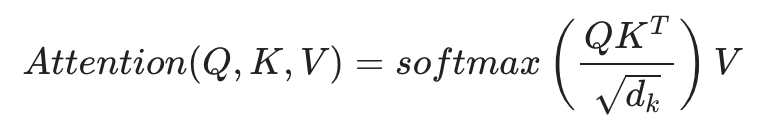

- 이 수식은 내적(dot product)을 통해 단어 벡터 간 유사도를 구한 후에, 특정 값을 분모로 나눠주는 방식
- Q와 K의 유사도를 구하였다고 하여 스케일드 닷 프로덕트 어텐션(Scaled Dot Product Attention) 이라고 함
- 유사도를 구하는 방법이 스케일드 닷 프로덕트(scaled dot product)였기 때문에 이런 이름이 붙은 것
  - 닷 프로덕트 어텐션(dot product attention) : 분모에 특정 값을 나눠주는 부분을 사용하지 않는 어텐션의 이름

In [109]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

print("슝=3")

슝=3


### 머리가 여러 개인 어텐션 (Multi head attention)
- 굉장히 어려운 문제가 가득한 시험지를 받았을 때 '혼자가 아니라 옆에서 누군가 같이 풀어준다면 좀 더 좋은 성적을 받을 텐데'

**병렬로 어텐션 수행하기**  
- 트랜스포머에서 `num_heads`라는 변수는 기계가 몇 개의 똑똑한 머리를 사용할지, 다시 말해 병렬적으로 몇 개의 어텐션 연산을 수행할지를 결정하는 하이퍼파라미터  
![https://wikidocs.net/images/page/31379/transformer18_final.PNG](https://wikidocs.net/images/page/31379/transformer18_final.PNG)
- `d_model` : 임베딩 벡터의 차원
- 초기 입력인 문장 행렬의 크기 : 문장의 길이 - 행 크기, d_model - 열 크기
- 트랜스포머는 이렇게 입력된 문장 행렬을 `num_heads`의 수만큼 쪼개서 어텐션을 수행
- `num_heads`의 개수만큼의 어텐션 값 행렬을 다시 하나로 concatenate함  
![https://wikidocs.net/images/page/31379/transformer17.PNG](https://wikidocs.net/images/page/31379/transformer17.PNG)


#### 멀티-헤드 어텐션
![http://jalammar.github.io/images/t/transformer_self-attention_visualization_3.png](http://jalammar.github.io/images/t/transformer_self-attention_visualization_3.png)
- `num_heads`의 값이 8일 때, 병렬로 수행되는 어텐션이 서로 다른 셀프 어텐션 결과를 얻을 수 있음을 보여줌
- `it_`이라는 토큰이 `animal_`과 유사하다고 보는 관점과 `street_`과 유사하다고 보는 관점이 한꺼번에 모두 표현 가능하다는 뜻

In [110]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs
print("슝=3")

슝=3


### 마스킹
- 특정 값들을 가려서 실제 연산에 방해가 되지 않도록 하는 기법
- 트랜스포머에서 사용하는 두 가지 마스킹
  - Padding Masking
  - Look-ahead maskin

#### 패딩 마스킹(Padding Masking)
- 패딩 토큰(Padding token)을 이용한 방법
![https://d3s0tskafalll9.cloudfront.net/media/images/1365906-20200410103623697-871078599.max-800x600.png](https://d3s0tskafalll9.cloudfront.net/media/images/1365906-20200410103623697-871078599.max-800x600.png)
- 문장의 길이가 서로 다를 때, 모든 문장의 길이를 동일하게 해줌
- 정해준 길이보다 짧은 문장의 경우에는 숫자 0을 채워서 문장의 길이를 맞춰줌
- 이렇게 주어진 숫자 0은 실제 의미가 있는 단어가 아니므로 실제 어텐션 등과 같은 연산에서는 제외 필요
- **패딩 마스킹**
  - 숫자 0인 위치를 체크


#### **오늘의 질문**  
Q. 왜 패딩 값이 0인데도 불구하고 꼭 패딩 마스크를 써야할까?  
- [The issue with entrywise multiplication with a binary matrix, is that 0
 values still contribute to softmax.](https://ai.stackexchange.com/a/41383)
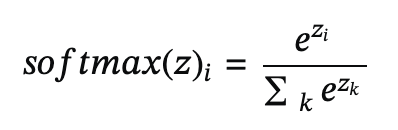

- 실제로 패딩된 값이 Attention Score에서 자동으로 0이 되지 않는 이유
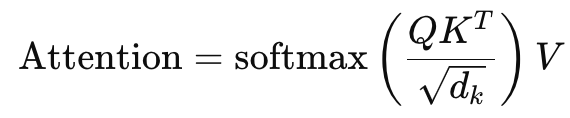
  - Attention Score 계산 공식
    - `QK^T` 연산 후 패딩된 토큰도 점수를 가지게 됨
    - `V` 값이 `[0,0,0,...]`이어도, Softmax는 패딩 위치에서 0이 아닌 확률을 생성할 수 있음
    - Softmax는 모든 값을 확률 분포로 변환하기 때문에, 패딩된 부분이 원래 0이라도 0 이상의 값으로 변할 가능성이 있음
    - 패딩된 부분이 Attention 연산에 영향을 주지 않도록 하기 위해 패딩 마스크를 사용해서 Softmax 전의 값들을 -∞(매우 작은 값)으로 만들어 줘야 함
      - 그리고 softmax를 적용하면 0으로 나옴

In [111]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("슝=3")

슝=3


정수 시퀀스를 입력으로 하면, 이 함수는 숫자가 0인 부분을 체크한 벡터를 리턴

In [43]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


#### Look-ahead masking, 다음 단어 가리기
- 순환 신경망, RNN과 트랜스포머는 문장을 입력받을 때 입력받는 방법이 전혀 다름
- RNN : step이라는 개념이 존재해서 각 step마다 단어가 순서대로 입력으로 들어가는 구조
- 트랜스포머 : 문장 행렬을 만들어 한 번에 행렬 형태로 입력으로 들어감
  - 추가적인 마스킹(Masking) 을 필요
  - 전체 문장이 문장 행렬로 들어가기 때문에 위치와 상관없이 모든 단어를 참고해서 다음 단어를 예측
  - 원하는 것은 이전 단어들로부터 다음 단어를 예측하는 훈련을 제대로 하는 것
  - 자신보다 다음에 나올 단어를 참고하지 않도록 가리는 기법 : **룩 어헤드 마스킹**

![https://d3s0tskafalll9.cloudfront.net/media/images/_.max-800x600.png](https://d3s0tskafalll9.cloudfront.net/media/images/_.max-800x600.png)
- Query 단어 뒤에 나오는 Key 단어들(빨간색으로 색칠된 부분)에 대해서는 마스킹
- 실제 어텐션 연산에서 가리는 역할
- 어텐션 연산 시에 현재 단어를 기준으로 이전 단어들하고만 유사도를 구함
  - 예를 들어,
    - Query 단어 : '찾고'
    - 이 '찾고'라는 행에는 `<s>`, `<나는>`, `<행복을>`, `<찾고>`까지의 열만 보이고 그 뒤 열은 아예 빨간색
    - 유사도를 구할 수 없도록 처리

In [112]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  # 룩어헤드 마스크
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  # 패딩 마스크
  padding_mask = create_padding_mask(x)
  # 마스크 두 개 합치기
  return tf.maximum(look_ahead_mask, padding_mask)
print("슝=3")

슝=3


In [45]:
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


- 마스킹을 수행할 때 만약에 숫자 0인 단어가 있다면 이 또한 패딩해야 함
- `create_look_ahead_mask()` 함수는 내부적으로 앞서 구현한 패딩 마스크 함수도 호출

In [47]:
print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


### 인코더
![http://jalammar.github.io/images/t/Transformer_encoder.png](http://jalammar.github.io/images/t/Transformer_encoder.png)
- 크게 총 2개의 서브 층(sublayer)으로 나눔
  - 셀프 어텐션 : 멀티 헤드 어텐션이 병렬로 있음


In [113]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


![http://jalammar.github.io/images/t/transformer_resideual_layer_norm_2.png](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_2.png)

- 인코더 층을 임베딩 층(Embedding layer) 과 포지셔널 인코딩(Positional Encoding) 을 연결
- 사용자가 원하는 만큼 인코더 층을 쌓음
  - 하이퍼파라미터인 `num_layers` 개수의 인코더 층을 쌓음
- 인코더와 디코더 내부에서는 각 서브 층 이후에 훈련을 돕는 Layer Normalization 사용

In [131]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


### 디코더
- 인코더와 비슷하지만, 인코더보다 조금 더 복잡
- 세 개의 서브 층
![http://jalammar.github.io/images/t/Transformer_decoder.png](http://jalammar.github.io/images/t/Transformer_decoder.png)
- 셀프 어텐션
- 인코더-디코더 어텐션
  - Query가 디코더의 벡터인 반면에 Key와 Value가 인코더의 벡터
  - 인코더가 입력 문장으로부터 정보를 디코더에 전달하는 과정
- 피드 포워드 신경망
![https://miro.medium.com/v2/resize:fit:1400/format:webp/1*abz_nltyDYtC6ThqNg4O6w.png](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*abz_nltyDYtC6ThqNg4O6w.png)
- 인코더의 셀프 어텐션과 마찬가지로 디코더의 셀프 어텐션, 인코더-디코더 어텐션 두 개의 어텐션 모두 스케일드 닷 프로덕트 어텐션을 멀티 헤드 어텐션으로 병렬적으로 수행

In [115]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


#### 디코더 층을 쌓아 디코더 만들기
- 임베딩 층(Embedding layer) 과 포지셔널 인코딩(Positional Encoding) 을 연결
- 사용자가 원하는 만큼 디코더 층을 쌓아 트랜스포머의 디코더가 완성
  - `num_layers` 파라미터 사용

In [132]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


### 챗봇의 병렬 데이터 받아오기
- Cornell Movie-Dialogs Corpus : 영화 및 TV 프로그램에서 사용되었던 대화의 쌍으로 구성된 데이터셋
- 이번 스텝에서 목표
  - 정해진 개수인 50,000개의 질문과 답변의 쌍을 추출
  - 문장에서 단어와 구두점 사이에 공백을 추가
  - 알파벳과 ! ? , . 이 4개의 구두점을 제외하고 다른 특수문자는 모두 제거

**에러 수정**  
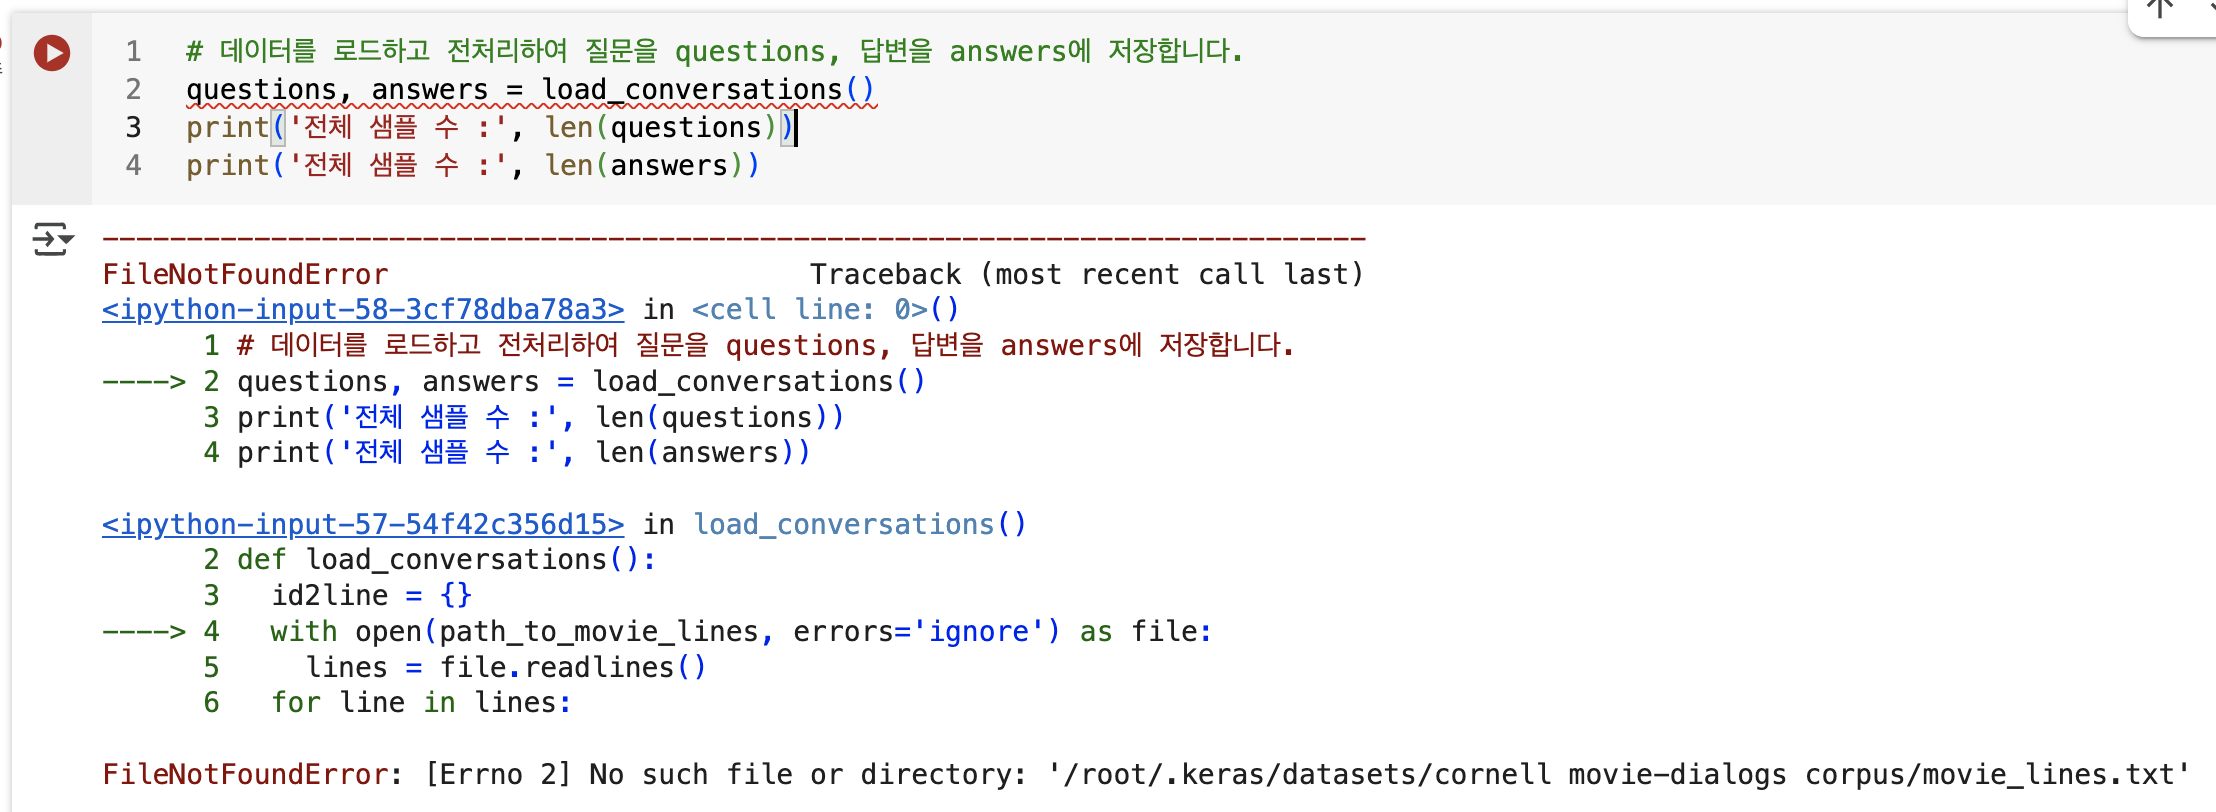

In [88]:
path_to_zip = tf.keras.utils.get_file(
    'cornell_movie_dialogs.zip',
    origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
    extract=True)

# path_to_dataset = os.path.join(
#     os.path.dirname(path_to_zip), "cornell movie-dialogs corpus")

# path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
# path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')

# 정확한 폴더명 확인
folders = os.listdir(path_to_zip)
print("압축 해제된 폴더 내 목록:", folders)

# 실제 존재하는 폴더 경로 찾기
full_paths = []
for folder in folders:
    full_path = os.path.join(path_to_zip, folder)
    print(f"경로 존재 여부 확인: {full_path} -> {os.path.exists(full_path)}")
    if os.path.exists(full_path) is True:
      full_paths.append(full_path)

path_to_dataset = full_paths[0]
path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')

print(path_to_dataset)
print(path_to_movie_lines)
print(path_to_movie_conversations)

print("슝=3")

압축 해제된 폴더 내 목록: ['cornell movie-dialogs corpus', '__MACOSX']
경로 존재 여부 확인: /root/.keras/datasets/cornell_movie_dialogs_extracted/cornell movie-dialogs corpus -> True
경로 존재 여부 확인: /root/.keras/datasets/cornell_movie_dialogs_extracted/__MACOSX -> True
/root/.keras/datasets/cornell_movie_dialogs_extracted/cornell movie-dialogs corpus
/root/.keras/datasets/cornell_movie_dialogs_extracted/cornell movie-dialogs corpus/movie_lines.txt
/root/.keras/datasets/cornell_movie_dialogs_extracted/cornell movie-dialogs corpus/movie_conversations.txt
슝=3


In [86]:
import os

print("ZIP 파일 경로:", path_to_zip)
print("파일 존재 여부:", os.path.exists(path_to_zip))
# 압축이 풀린 폴더 내부의 파일 리스트 확인
print("압축 해제된 폴더 내 파일 목록:", os.listdir(path_to_zip))

print("path_to_dataset 파일 경로:", path_to_dataset)
print("파일 존재 여부:", os.path.exists(path_to_dataset))
print("압축 해제된 폴더 내 파일 목록:", os.listdir(path_to_dataset))

print("path_to_movie_lines 파일 경로:", path_to_movie_lines)
print("파일 존재 여부:", os.path.exists(path_to_movie_lines))

ZIP 파일 경로: /root/.keras/datasets/cornell_movie_dialogs_extracted
파일 존재 여부: True
압축 해제된 폴더 내 파일 목록: ['cornell movie-dialogs corpus', '__MACOSX']
path_to_dataset 파일 경로: /root/.keras/datasets/cornell movie-dialogs corpus
파일 존재 여부: False


FileNotFoundError: [Errno 2] No such file or directory: '/root/.keras/datasets/cornell movie-dialogs corpus'

데이터 중에서 5만 개만 가져오도록 하고 질문과 답변의 쌍의 형태로 데이터셋을 가공

In [100]:
# 사용할 샘플의 최대 개수
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


정규 표현식(Regular Expression) 을 사용하여 구두점(punctuation) 을 제거하여 단어를 토크나이징(tokenizing) 하는 일에 방해가 되지 않도록 정제

In [117]:
# 전처리 함수
def preprocess_sentence(sentence):
  # 입력받은 sentence를 소문자로 변경하고 양쪽 공백을 제거
  sentence = (sentence.lower()).strip()

  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  # 연속된 공백을 하나의 공백으로 전환
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  sentence = re.sub(r"[^a-z?.!,]", " ", sentence)
  sentence = sentence.strip()
  return sentence
print("슝=3")

슝=3


In [118]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
def load_conversations():
  id2line = {}
  with open(path_to_movie_lines, errors='ignore') as file:
    lines = file.readlines()
  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    id2line[parts[0]] = parts[4]

  inputs, outputs = [], []
  with open(path_to_movie_conversations, 'r') as file:
    lines = file.readlines()

  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]

    for i in range(len(conversation) - 1):
      # 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용.
      inputs.append(preprocess_sentence(id2line[conversation[i]]))
      outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))

      if len(inputs) >= MAX_SAMPLES:
        return inputs, outputs
  return inputs, outputs
print("슝=3")

슝=3


In [119]:
# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.
questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 50000
전체 샘플 수 : 50000


In [147]:
print(questions)

[[8336   37   18 ...  238    1 8337]
 [8336   72    3 ...    0    0    0]
 [8336   36    6 ...    0    0    0]
 ...
 [8336  207    2 ...    0    0    0]
 [8336    4  294 ...    0    0    0]
 [8336   80    3 ...    0    0    0]]


### 병렬 데이터 전처리하기
- 질문과 답변의 셋을 각각 questions와 answers에 저장하였으므로, 본격적으로 전처리를 진행
1. TensorFlow Datasets SubwordTextEncoder 를 토크나이저로 사용
   - 단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고,  각 토큰을 고유한 정수로 인코딩
2. 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 START_TOKEN 및 END_TOKEN을 추가
3. 최대 길이 MAX_LENGTH 인 40을 넘는 문장들은 필터링
4. MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 패딩

#### 단어장 만들기
- 단어장을 만들 때는 질문과 답변 데이터셋을 모두 사용

In [120]:
import tensorflow_datasets as tfds
print("살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐")

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("슝=3 ")

살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐
슝=3 


- 디코더의 문장 생성 과정에서 사용할 '시작 토큰'과 '종료 토큰'에 대해서도 임의로 단어장에 추가하여서 정수를 부여

In [121]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("슝=3")

슝=3


In [122]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8336]
END_TOKEN의 번호 : [8337]


- 두 개의 토큰을 추가해 주었기 때문에 단어장의 크기도 +2임

In [123]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8338


#### 2. 각 단어를 고유한 정수로 인코딩(Integer encoding) & 패딩(Padding)
- `tensorflow_datasets`의 `SubwordTextEncoder`를 사용해서 `tokenizer`를 정의하고 Vocabulary를 만들었다면
  - `tokenizer.encode()`로 각 단어를 정수로 변환 가능
  - `tokenizer.decode()`를 통해 정수 시퀀스를 단어 시퀀스로 변환

In [124]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [62, 8, 36, 8177, 50]
정수 인코딩 후의 21번째 답변 샘플: [7835, 1126, 19, 59, 2, 4, 340, 10, 1683, 14, 1114, 749, 2607, 272, 17, 74, 14, 109, 2162, 864, 3, 63, 4, 23, 357, 208, 62, 8, 36, 901, 2310, 8112, 347, 1040, 5187, 4232, 335, 1]


- 최대 길이를 정하고, 해당 길이로 패딩(padding)

In [103]:
MAX_LENGTH = 40

In [125]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)

  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs
print("슝=3")

슝=3


- 정수 인코딩 과정을 수행하면서 샘플의 길이가 40을 넘는 경우는 샘플들을 필터링
- 일부 샘플이 제외
- 단어장의 크기와 샘플의 개수를 확인

In [126]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8338
필터링 후의 질문 샘플 개수: 43982
필터링 후의 답변 샘플 개수: 43982


#### 3. 교사 강요(Teacher Forcing) 사용하기
- `tf.data.Dataset` API : 훈련 프로세스의 속도가 빨라지도록 입력 파이프라인을 구축하는 API
- 이를 사용하기 위해서 질문과 답변의 쌍을 tf.data.Dataset의 입력으로 넣어주는 작업
- 디코더의 입력과 실제값(레이블)을 정의해 주기 위해서는 **교사 강요(Teacher Forcing)** 이라는 언어 모델의 훈련 기법을 이해해야함
  - 테스트 과정에서 t 시점의 출력이 t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용하는 훈련 기법
  - 모델이 t 시점에서 예측한 값을 t+1 시점에 입력으로 사용하지 않고 t 시점의 레이블, 즉, 실제 알고있는 정답을 t+1 시점의 입력
  - 한 번 잘못 예측하면 뒤에서의 예측까지 영향을 미쳐 훈련 시간이 느려지게 되기 때문에 사용
- 자기회귀 모델(auto-regressive model, AR)
  - 이전 자신의 출력이 현재 자신의 상태를 결정하는 모델
  - RNN 언어 모델, 트랜스포머의 디코더 또한 자기회귀 모델

[9-12] Q. 만약, answers의 한 샘플이 다음과 같았다고 해봅시다.

샘플 : '`<START_TOKEN>` I AM A STUDENT `<END_TOKEN>` `<PAD>` `<PAD>` `<PAD>` `<PAD>`'

`<START_TOKEN>`은 문장의 시작을 의미하는 시작 토큰, `<END_TOKEN>`은 문장의 끝을 의미하는 종료 토큰 `<PAD>`는 패딩을 위해 사용되는 패딩 토큰입니다.

교사 강요를 적용하기 위해서 위 샘플을 디코더의 입력과 레이블로 사용한다고 하였을 때, 각각 어떻게 수정해서 입력과 레이블로 사용해야 할까요?

> 입력 : `<START_TOKEN>` I AM A STUDENT `<END_TOKEN>` `<PAD>` `<PAD>` `<PAD>` 레이블 : I AM A STUDENT `<END_TOKEN>` `<PAD>` `<PAD>` `<PAD>` `<PAD>`

- 질문과 답변의 쌍을 tf.data.Dataset API의 입력으로 사용하여 파이프라인을 구성
- 교사 강요를 위해서 answers[:, :-1]를 디코더의 입력값, answers[:, 1:]를 디코더의 레이블로 사용

In [146]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

슝=3


### 모델 정의 및 학습
- 인코더 층 함수와 디코더 층 함수를 사용하여 트랜스포머 함수를 정의

In [128]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


#### 1. 모델 생성
- 하이퍼파라미터 : `num_layers`, `d-Model`, `units`
- Paper : `num_layers`는 6, `d-Model`은 512

In [133]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)       │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dec_inputs (InputLayer)   │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ enc_padding_mask (Lambda) │ (None, 1, 1, None)     │              0 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encoder (Functional)      │ (None, None, 256)      │      3,188,736 │ inputs[0][0],          │
│                           │                        │                │ enc_padding_mask[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ look_ahead_mask (Lambda)  │ (None, 1, None, None)  │              0 │ dec_inputs[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dec_padding_mask (Lambda) │ (None, 1, 1, None)     │              0 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder (Functional)      │ (None, None, 256)      │      3,716,096 │ dec_inputs[0][0],      │
│                           │                        │                │ encoder[0][0],         │
│                           │                        │                │ look_ahead_mask[0][0], │
│                           │                        │                │ dec_padding_mask[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ outputs (Dense)           │ (None, None, 8338)     │      2,142,866 │ decoder[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,047,698 (34.51 MB)

 Trainable params: 9,047,698 (34.51 MB)

 Non-trainable params: 0 (0.00 B)

#### 2. 손실 함수(Loss function)
- 레이블인 시퀀스에 패딩이 되어 있으므로, loss를 계산할 때 패딩 마스크를 적용

In [134]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("슝=3")

슝=3


#### 3. 커스텀 된 학습률(Learning rate)
- 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)
  - 최근에는 모델학습 초기에 learning rate를 급격히 높였다가, 이후 train step이 진행됨에 따라 서서히 낮추어 가면서 안정적으로 수렴하게 하는 고급 기법을 널리 사용
- 커스텀 학습률 스케줄러를 통한 아담 옵티마이저를 사용
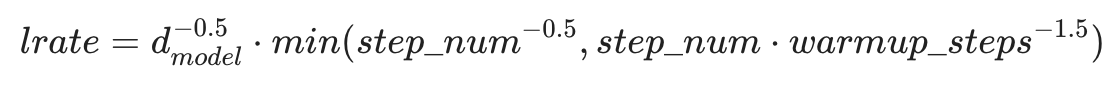

In [135]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("슝=3")

슝=3


- 커스텀 학습률 스케줄링 계획을 시각화
- step_num^-0.5 에 비례하는 부분과 step_num에 비례하는 부분 중 작은 쪽을 택하도록 되어 있음
- 학습 초기에는 learning_rate가 step_num에 비례해서 증가하다가 이후로는 감소하는 것을 확인

Text(0.5, 0, 'Train Step')

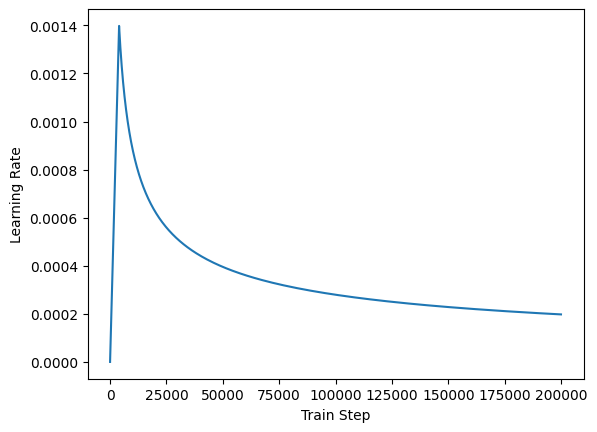

In [136]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

#### 4. 모델 컴파일
- 손실 함수와 커스텀 된 학습률(learning rate)을 사용하여 모델을 컴파일

In [137]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


#### 5. 훈련하기

In [139]:
dataset

<_PrefetchDataset element_spec=({'inputs': TensorSpec(shape=(None, 40), dtype=tf.int32, name=None), 'dec_inputs': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None)}, {'outputs': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None)})>

In [140]:
for sample in dataset.take(1):
    print(sample)

({'inputs': <tf.Tensor: shape=(64, 40), dtype=int32, numpy=
array([[8336,   80,    7, ...,    0,    0,    0],
       [8336,  973,   40, ...,    0,    0,    0],
       [8336, 1828,   25, ...,    0,    0,    0],
       ...,
       [8336,   80,    2, ...,    0,    0,    0],
       [8336,  108,    1, ...,    0,    0,    0],
       [8336,   21,  410, ...,    0,    0,    0]], dtype=int32)>, 'dec_inputs': <tf.Tensor: shape=(64, 39), dtype=int32, numpy=
array([[8336,  320,   36, ...,    0,    0,    0],
       [8336,   80,    7, ...,    0,    0,    0],
       [8336,   81,    3, ...,    0,    0,    0],
       ...,
       [8336,  499,    1, ...,    0,    0,    0],
       [8336,    5,   37, ...,    0,    0,    0],
       [8336,    4,  232, ...,    0,    0,    0]], dtype=int32)>}, {'outputs': <tf.Tensor: shape=(64, 39), dtype=int32, numpy=
array([[ 320,   36,    9, ...,    0,    0,    0],
       [  80,    7, 8337, ...,    0,    0,    0],
       [  81,    3,  385, ...,    0,    0,    0],
       ...,

In [141]:
for sample in dataset.take(1):
    print("샘플 데이터 타입:", type(sample))
    if isinstance(sample, tuple) and len(sample) == 2:
        print("입력 데이터 타입:", type(sample[0]))
        print("출력 데이터 타입:", type(sample[1]))

샘플 데이터 타입: <class 'tuple'>
입력 데이터 타입: <class 'dict'>
출력 데이터 타입: <class 'dict'>


**에러 해결**  
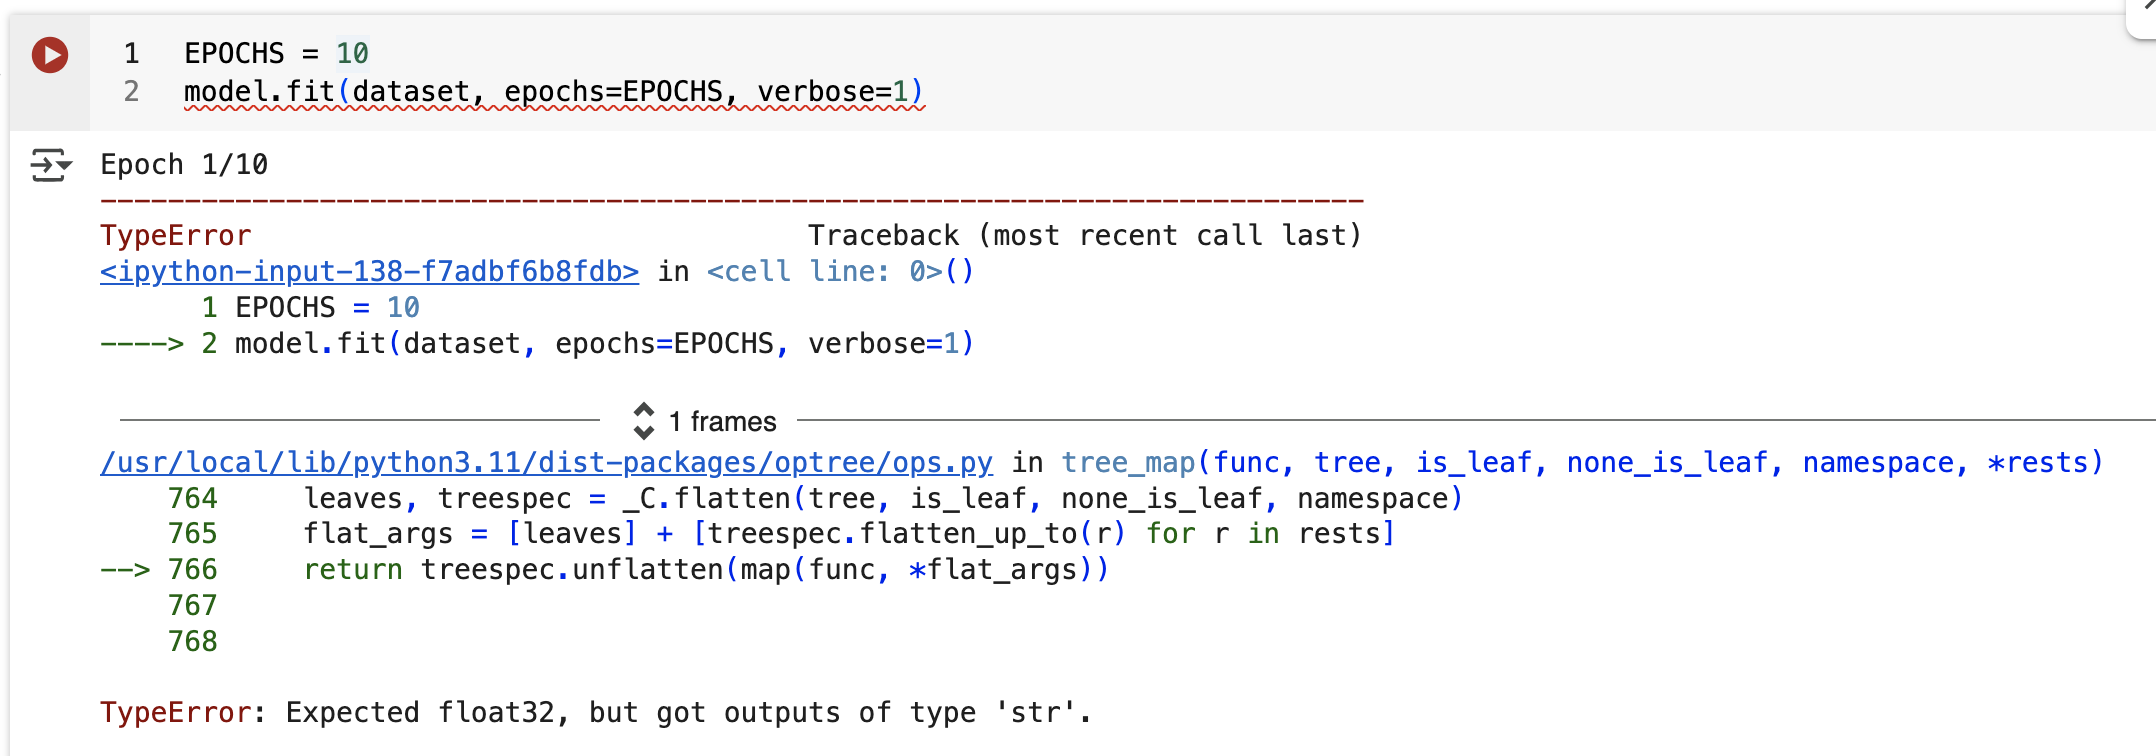

In [143]:
print("questions dtype:", type(questions))
print("answers dtype:", type(answers))

print("첫 번째 질문 샘플:", questions[0])
print("첫 번째 답변 샘플:", answers[0])

questions dtype: <class 'numpy.ndarray'>
answers dtype: <class 'numpy.ndarray'>
첫 번째 질문 샘플: [8336   37   18  118   32 2864   19 1141 8200 2986 8112 2407 3624 2410
   13 7545  982 6676 8112   48  466   87 5585 7959  233 3125 3961  138
 1487 1026   45   79   41    6 2151 8180    2  238    1 8337]
첫 번째 답변 샘플: [8336   72    3    4  184   18   58  366   39 1095 1542 4232  817    3
   54   15    8 1295   39   26    1 8337    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [144]:
import tensorflow as tf

# 데이터 타입 변환 함수
def convert_dtype(inputs, outputs):
    inputs['inputs'] = tf.cast(inputs['inputs'], tf.float32)
    inputs['dec_inputs'] = tf.cast(inputs['dec_inputs'], tf.float32)
    outputs['outputs'] = tf.cast(outputs['outputs'], tf.float32)
    return inputs, outputs

# 데이터셋 변환 적용
dataset = dataset.map(convert_dtype)

print("🚀 데이터 타입 변환 완료!")

🚀 데이터 타입 변환 완료!


In [145]:
EPOCHS = 10
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/10


TypeError: Expected float32, but got outputs of type 'str'.

### 챗봇 테스트하기
- 예측(inference) 단계
  1. 새로운 입력 문장에 대해서는 훈련 때와 동일한 전처리를 거친다.
  2. 입력 문장을 토크나이징하고, START_TOKEN과 END_TOKEN을 추가한다.
  3. 패딩 마스킹과 룩 어헤드 마스킹을 계산한다.
  4. 디코더는 입력 시퀀스로부터 다음 단어를 예측한다.
  5. 디코더는 예측된 다음 단어를 기존의 입력 시퀀스에 추가하여 새로운 입력으로 사용한다.
  6. END_TOKEN이 예측되거나 문장의 최대 길이에 도달하면 디코더는 동작을 멈춘다.


In [79]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("슝=3")

슝=3


- 임의의 입력 문장에 대해서 `decoder_inference()` 함수를 호출하여 챗봇의 대답을 얻는 `sentence_generation()` 함수

In [80]:
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence
print("슝=3")

슝=3


- 임의의 문장으로부터 챗봇의 대답 받기

In [ ]:
sentence_generation('Where have you been?')

```
입력 : Where have you been?
출력 : i m going to be a bank teller . i m not going to be a bank teller . i m not going to be the first .
[42]:
'i m going to be a bank teller . i m not going to be a bank teller . i m not going to be the first .'
```

In [ ]:
sentence_generation("It's a trap")

```
입력 : It's a trap
출력 : we ll have to go to the prom and we ll never get the chance to find out of the ship .
[43]:
'we ll have to go to the prom and we ll never get the chance to find out of the ship .'
```